Utworzyć ramkę danych, pokazującą ile leków zostało zatwierdzonych, wycofanych, ile jest w fazie eksperymentalnej (ang. *experimental* lub *investigational*) i dopuszczonych w leczeniu zwierząt. Przedstawić te dane na wykresie kołowym. Podać liczbę zatwierdzonych leków, które nie zostały wycofane.

In [8]:
import pandas as pd
import lxml
import xml.etree.ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

In [9]:
path = 'data/drugbank_partial.xml'
ns = {'db': 'http://www.drugbank.ca'}

In [10]:
tree = ET.parse(path)
root = tree.getroot()

In [11]:
def unwrap(field, node: ET.Element):
    return getattr(node.find(f"db:{field}", ns), "text", None)

In [12]:
def unwrap_attrib(attrib, node: ET.Element):
    return node.attrib.get(attrib)

In [22]:
def status_counts():
    currently_approved = 0
    status_counter = {}
    for drug in root.findall('db:drug', ns):
        status = [s.text for s in drug.findall('db:groups/db:group', ns)]
        if ('approved' in status) and not ('withdrawn' in status):
            currently_approved += 1
        for s in status:
            status_counter.setdefault(s, 0)
            status_counter[s] += 1

    print("Approved and not withdrawn total: ", currently_approved)
    return status_counter

In [28]:
def show_pie(counts):
    plt.figure(figsize=(10, 10))
    plt.pie(counts.values(), labels=counts.keys(), autopct='%1.2f%%')
    plt.title("Drug Status Distribution (All)")
    plt.show()

In [27]:
def status_df(counts):
    return pd.DataFrame({"Total": counts.values()}, index=counts.keys())

Approved and not withdrawn total:  89


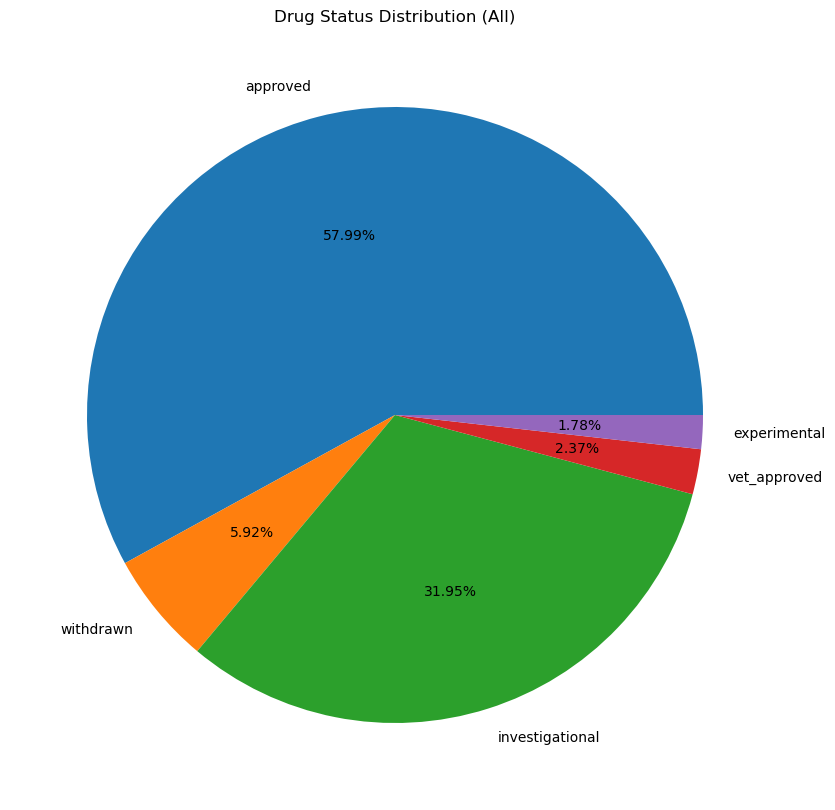

,Total
approved,98
withdrawn,10
investigational,54
vet_approved,4
experimental,3


In [29]:
counts = status_counts()
show_pie(counts)
status_df(counts)